In [44]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler # To normalize features
#from mymodel import predict

In [31]:
# Generate dummy random data X of size (300,6) and y of size (300,)
X = np.load("Data/X_train.npy")
y = np.load("Data/Y_train.npy")

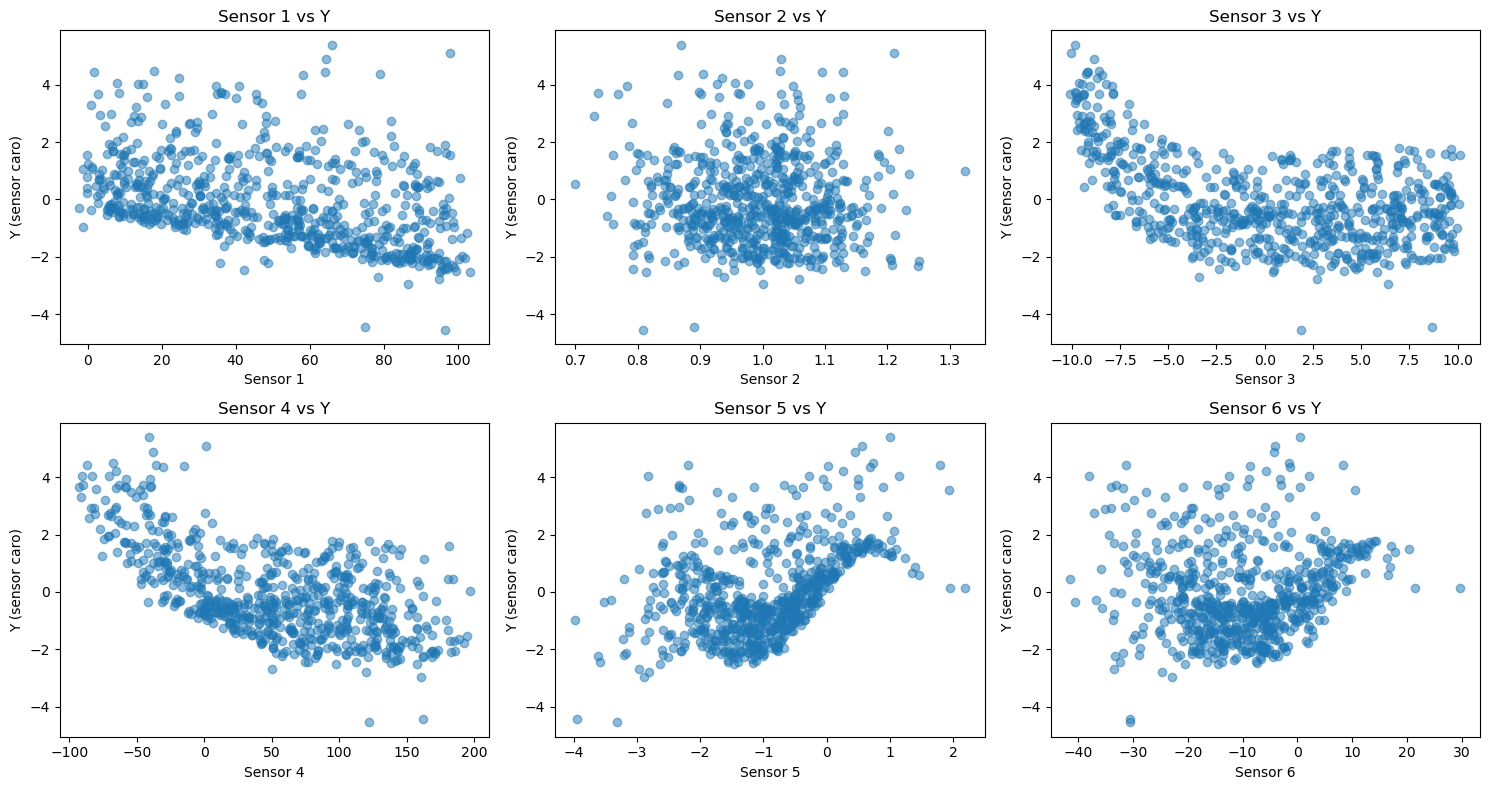

In [52]:
# X_train tem 6 colunas (um sensor em cada)
n_features = X.shape[1]

plt.figure(figsize=(15, 8))

for i in range(n_features):
    plt.subplot(2, 3, i+1)  # cria grid 2x3
    plt.scatter(X[:, i], y, alpha=0.5)
    plt.xlabel(f"Sensor {i+1}")
    plt.ylabel("Y (sensor caro)")
    plt.title(f"Sensor {i+1} vs Y")

plt.tight_layout()
plt.show()

In [39]:
# Separate the data into training and test for model evaluation
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, test_size=0.15, random_state=42)

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

print(X_train_scaled)

[[-1.22174578 -0.15519708 -1.51692004 -1.87562088  2.14165409  1.02400578]
 [-0.70865504  0.00568111  1.2388036   0.69752364  1.65160341  1.96057281]
 [-0.87457644  2.01685451 -1.70617546 -1.74045998 -0.16872712 -0.9775112 ]
 ...
 [-0.61583278  0.55602884  1.5800694   0.8957916   0.93038722  1.54409515]
 [-0.00259266 -1.36228452  0.83077279  0.82601255  0.9015661   1.25042112]
 [ 0.37297555  0.86103827 -1.03226945 -0.68842034 -0.89138091 -1.28083117]]


In [53]:
for degree in range(1, 6):
    polynomial_model = PolynomialFeatures(degree=degree, include_bias=False)
    X_polynomial = polynomial_model.fit_transform(X_train_scaled)

    print(X_polynomial.shape)

(416, 6)
(416, 27)
(416, 83)
(416, 209)
(416, 461)


Degree 1: X_polynomial shape = (416, 6)


ValueError: x and y must be the same size

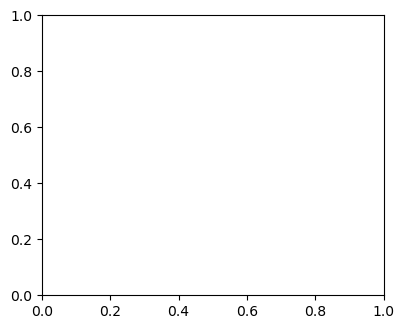

In [ ]:
for degree in range(1, 6):
    polynomial_model = PolynomialFeatures(degree=degree, include_bias=False)
    X_polynomial = polynomial_model.fit_transform(X_train_scaled)
    
    print(f"Degree {degree}: X_polynomial shape = {X_polynomial.shape}")
    
    # Plotar apenas os 6 sensores originais vs Y (sensor caro)
    plt.figure(figsize=(15, 8))
    for i in range(n_features):
        plt.subplot(2, 3, i+1)  # cria grid 2x3
        plt.scatter(X_train_scaled[:, i], y_train, alpha=0.5)
        plt.xlabel(f"Sensor {i+1}")
        plt.ylabel("Y (sensor caro)")
        plt.title(f"Sensor {i+1} vs Y")
    
    plt.suptitle(f"Relação Sensor vs Y (Degree {degree})", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()